In [19]:
#   Converting Camera Matrix (openCV) to openGl
#   Sources:
#   http://www.info.hiroshima-cu.ac.jp/~miyazaki/knowledge/teche0092.html
#   https://fruty.io/2019/08/29/augmented-reality-with-opencv-and-opengl-the-tricky-projection-matrix/

import numpy as np
import matplotlib.pyplot as plt
import os
from functions import compare_projections
from functions import project_opencv
from functions import project_opengl

np.set_printoptions(suppress=True,
                    formatter={'float_kind': '{:f},'.format})

In [20]:
# Camera Matrix (OpenCV)

camera_mtx = np.loadtxt(fname= os.getcwd() +  '/storage/opencv_matrix.txt', delimiter=',')
info =  np.loadtxt(fname= os.getcwd() + '/storage/image_info.txt', delimiter=',')

cx = camera_mtx[0][2]
cy = camera_mtx[1][2]

fx = camera_mtx[0][0]
fy = camera_mtx[1][1]

w = info[0]
h = info[1]

near = 1
far = 20

opengl_mtx = np.array([
    [2*fx/w, 0.0, (w - 2*cx)/w, 0.0],
    [0.0, -2*fy/h, (h - 2*cy)/h, 0.0],
    [0.0, 0.0, (-far - near) / (far - near), -2.0*far*near/(far-near)],
    [0.0, 0.0, -1.0, 0.0]
])

np.savetxt(fname=os.getcwd() + '/storage/opengl_matrix.txt',X=opengl_mtx, delimiter=',',header='opengl_mtx')

output_file = open(os.getcwd() + '/outputs/opengl_output.txt', 'w')
output_file.write(str(opengl_mtx) + '\n\n')

print('OpenCV Matrix')
print(camera_mtx, '\n')
print('OpenGL Matrix')
print(opengl_mtx, '\n')
print('Image Properties')
print('width : ',w)
print('height: ',h,'\n')

points = [
    # np.array([0.0, 0.0, 1.0]),
    # np.array([20.0, 40.0, 100.0]),
    # np.array([300.0, 600.0, 1000.0])
    np.array([-1.0, -1.0, 10.0]),
    np.array([1.0, -1.0, 10.0]),
    np.array([1.0, 1.0, 10.0]),
    np.array([-1.0, 1.0, 10.0]),
]

for point in points:
   compare_projections(point=point,camera_mtx=camera_mtx,opengl_mtx=opengl_mtx,w=w,h=h)



OpenCV Matrix
[[952.521725, 0.000000, 349.799365,]
 [0.000000, 950.798974, 641.581553,]
 [0.000000, 0.000000, 1.000000,]] 

OpenGL Matrix
[[2.645894, 0.000000, 0.028335, 0.000000,]
 [0.000000, -1.485623, -0.002471, 0.000000,]
 [0.000000, 0.000000, -1.222222, -2.222222,]
 [0.000000, 0.000000, -1.000000, 0.000000,]] 

Image Properties
width :  720.0
height:  1280.0 



clip_point=  [0.765433, -0.443216, -1.000000, 1.000000,]
ndc_point=  [0.765433, -0.443216, -1.000000, 1.000000,]     
x=  [0.765433, -0.443216, -1.000000, 1.000000,]
viewport_point=  [635.555883, 356.341861, 0.000000, 1.000000,] 

viewport_point=  [635.555883, 923.658139, 0.000000, 1.000000,] 

clip_point=  [1.030022, -0.443216, -1.000000, 1.000000,]
ndc_point=  [1.030022, -0.443216, -1.000000, 1.000000,]     
x=  [1.030022, -0.443216, -1.000000, 1.000000,]
viewport_point=  [730.808055, 356.341861, 0.000000, 1.000000,] 

viewport_point=  [730.808055, 923.658139, 0.000000, 1.000000,] 

clip_point=  [1.030022, -0.591778, -1.000000, 1.000000,]
ndc_point=  [1.030022, -0.591778, -1.000000, 1.000000,]     
x=  [1.030022, -0.591778, -1.000000, 1.000000,]
viewport_point=  [730.808055, 261.261964, 0.000000, 1.000000,] 

viewport_point=  [730.808055, 1018.738036, 0.000000, 1.000000,] 

clip_point=  [0.765433, -0.591778, -1.000000, 1.000000,]
ndc_point=  [0.765433, -0.591778, -1.000000, 1.000000,

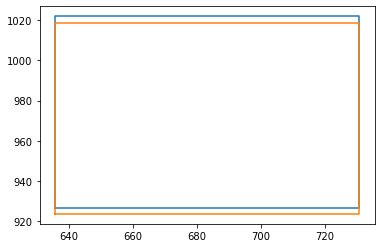

In [21]:
points = [
    # np.array([-0.1, -0.1, 10.0]),
    # np.array([0.1, -0.1, 10.0]),
    # np.array([0.1, 0.1, 10.0]),
    # np.array([-0.1, 0.1, 10.0]),
    np.array([0.3, 0.3, 1.0]),
    np.array([0.4, 0.3, 1.0]),
    np.array([0.4, 0.4, 1.0]),
    np.array([0.3, 0.4, 1.0]),
]

open_cv_projection = project_opencv(points, camera_mtx)
open_gl_projection = project_opengl(points, opengl_mtx,w,h)

# print(opengl_mtx)

# print(open_cv_projection[0])
# print(open_cv_projection[1])
# print(open_cv_projection[2])
# print(open_cv_projection[3])
# print()
# print(open_gl_projection[0])
# print(open_gl_projection[1])
# print(open_gl_projection[2])
# print(open_gl_projection[3])

#Draw Shape 


coord = open_cv_projection
coord.append(open_cv_projection[0]) #repeat the first point to create a 'closed loop'

coord1 = open_gl_projection
coord1.append(open_gl_projection[0])

xs, ys = zip(*open_cv_projection) #create lists of x and y values
xs1,ys1 = zip(*open_gl_projection)

plt.figure()
plt.plot(xs,ys) 
plt.plot(xs1,ys1) 

plt.show() # if you need...